надо проверить гипотезу, что пользователи, которые выбирают больше двух комплектов приборов, оставляют больше чаевых, чем остальные. У  есть доступ к таблице с чаевыми за Январь 2022 года. 

cutlery — количество столовых приборов
date — дата и время покупки
order_price — сумма заказа
uid — уникальный id пользователя
tips — сумма чаевых
order_id — уникальный номер заказа

Проанализируйте данные. Найдите подтверждение или опровержение гипотезы.
Соберите сегмент пользователей для дальнейшей коммуникации. В сегмент должны попасть все uid пользователей, которые добавляли в заказ больше двух комплектов столовых приборов и делали заказ не в январские праздники на сумму больше 800p. Укажите количество таких пользователей.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/denis/Downloads/shmya_final_version (1).csv')
df

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
1,2022-01-23 11:09:22,4,110,309,325757,60500835
2,2022-01-24 19:40:03,1,10,891,986730,43230531
3,2022-01-14 18:01:22,5,70,749,868648,46180789
4,2022-01-19 22:32:43,2,10,469,863523,59266169
...,...,...,...,...,...,...
26052,2022-01-04 05:21:39,4,10,763,182587,85041983
26053,2022-01-18 14:43:12,3,60,790,187031,47894568
26054,2022-01-26 18:08:02,1,90,502,247419,75350869
26055,2022-01-18 05:55:09,2,80,418,474601,79438423


In [3]:
df['date'] = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26057 entries, 0 to 26056
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         26057 non-null  datetime64[ns]
 1   cutlery      26057 non-null  int64         
 2   tips         26057 non-null  int64         
 3   order_price  26057 non-null  int64         
 4   uid          26057 non-null  int64         
 5   order_id     26057 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.2 MB


In [5]:
df.isnull().sum() # нет пропущенных значений

date           0
cutlery        0
tips           0
order_price    0
uid            0
order_id       0
dtype: int64

In [6]:
df.describe()

,cutlery,tips,order_price,uid,order_id
count,26057.000000,26057.000000,26057.000000,26057.000000,2.605700e+04
mean,3.197759,61.170127,604.250528,550463.164831,5.502894e+07
std,1.447685,45.747142,312.649276,257023.916767,2.575420e+07
min,1.000000,0.000000,0.000000,100192.000000,1.000406e+07
25%,2.000000,20.000000,417.000000,326445.000000,3.285579e+07
50%,3.000000,50.000000,619.000000,550824.000000,5.499804e+07
75%,4.000000,90.000000,821.000000,777225.000000,7.700578e+07
max,6.000000,170.000000,1939.000000,999966.000000,9.997691e+07


<AxesSubplot:>

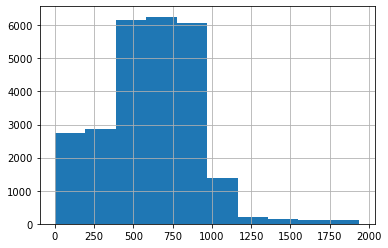

In [7]:
df['order_price'].hist()

/Users/denis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cutlery', ylabel='count'>

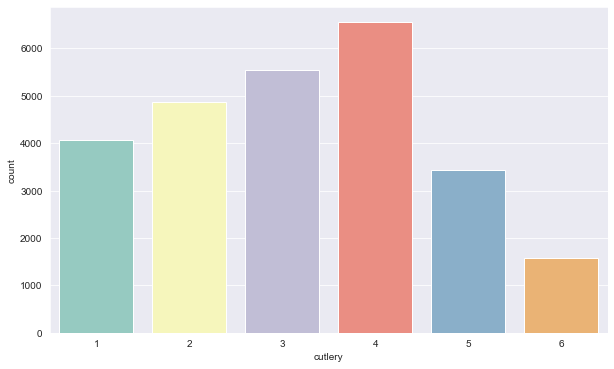

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(df['cutlery'],palette='Set3')

In [9]:
df.corr().transpose()


,cutlery,tips,order_price,uid,order_id
cutlery,1.000000,0.161478,-0.170217,0.005171,0.007509
tips,0.161478,1.000000,0.520580,-0.003633,0.004184
order_price,-0.170217,0.520580,1.000000,-0.004961,0.005608
uid,0.005171,-0.003633,-0.004961,1.000000,0.006298
order_id,0.007509,0.004184,0.005608,0.006298,1.000000


Существует положительная корреляция между чаевыми и количеством приборов

In [10]:
df_test = df.query("cutlery >= 2")
df_test

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
1,2022-01-23 11:09:22,4,110,309,325757,60500835
3,2022-01-14 18:01:22,5,70,749,868648,46180789
4,2022-01-19 22:32:43,2,10,469,863523,59266169
5,2022-01-05 11:45:43,4,90,340,728911,51050143
...,...,...,...,...,...,...
26051,2022-01-07 14:42:07,2,80,506,764884,49742600
26052,2022-01-04 05:21:39,4,10,763,182587,85041983
26053,2022-01-18 14:43:12,3,60,790,187031,47894568
26055,2022-01-18 05:55:09,2,80,418,474601,79438423


In [11]:
df_control = df.query("cutlery == 1")
df_control

,date,cutlery,tips,order_price,uid,order_id
2,2022-01-24 19:40:03,1,10,891,986730,43230531
8,2022-01-24 11:45:30,1,70,445,594275,61860247
9,2022-01-23 05:48:53,1,50,464,596696,80813955
13,2022-01-28 23:46:49,1,90,855,667257,17012903
14,2022-01-13 16:27:18,1,10,928,822014,34667331
...,...,...,...,...,...,...
26026,2022-01-17 19:02:39,1,10,428,725267,85484022
26032,2022-01-12 19:01:51,1,10,403,445985,38523232
26039,2022-01-29 12:39:14,1,30,641,395026,16746453
26047,2022-01-15 18:29:15,1,40,688,943617,15580566


In [12]:
df_control.tips.describe()

count    4068.000000
mean       44.587021
std        24.828926
min        10.000000
25%        20.000000
50%        40.000000
75%        60.000000
max        90.000000
Name: tips, dtype: float64

In [13]:
df_test.tips.describe()

count    21989.000000
mean        64.238028
std         48.017434
min          0.000000
25%         20.000000
50%         60.000000
75%        100.000000
max        170.000000
Name: tips, dtype: float64

In [14]:
xxxx = df_test["tips"].mean() - df_control["tips"].mean() 
tips_uplift = xxxx/df_control["tips"].mean()
tips_uplift

0.4407338093008252

##### Аплифт

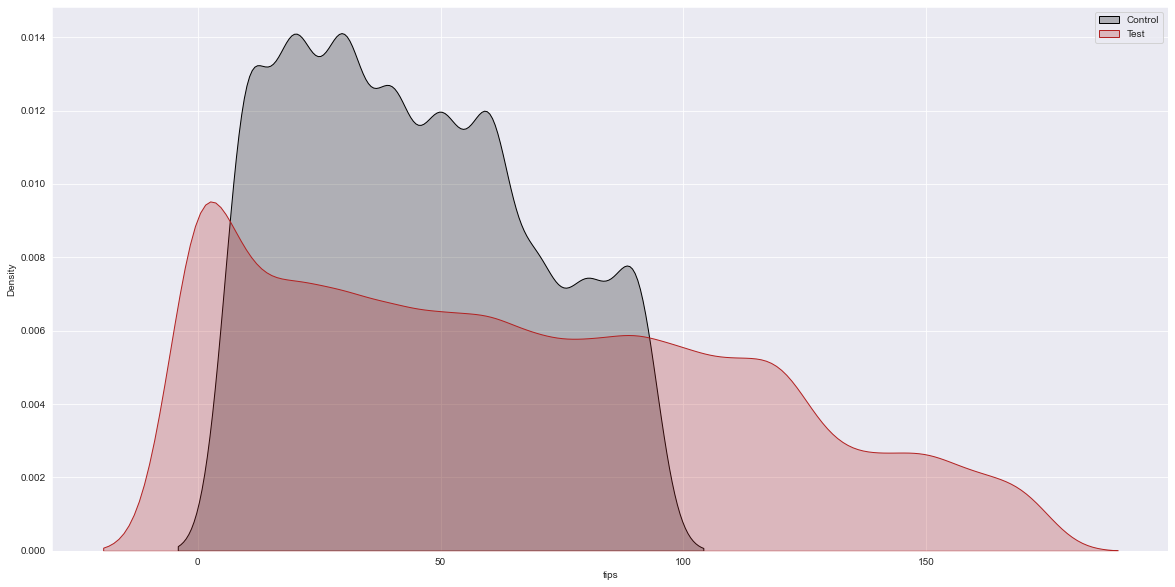

In [15]:
plt.figure(figsize=(20, 10))
sns.kdeplot(df_control.tips, label="Control", shade = True, color = '#000000')
sns.kdeplot(df_test.tips, label="Test", shade = True, color = '#B22222')
plt.legend()

In [16]:
import scipy.stats
from scipy.stats import ttest_ind

In [17]:
scipy.stats.mannwhitneyu(df_control['tips'], 
                      df_test['tips'])

MannwhitneyuResult(statistic=35707955.5, pvalue=8.180311446668206e-94)

In [18]:
scipy.stats.ttest_ind (df_control['tips'], 
                      df_test['tips'])

Ttest_indResult(statistic=-25.479314236084974, pvalue=1.8072881241552059e-141)

#### Чем ниже значение p, тем выше статистическая значимость наблюдаемой разницы.

## Гипотеза что те кто берет >2 приборов оставляют больше чаевых подтверждается

In [68]:
kk = df.query("order_price > 800 & cutlery >= 2 & date >= '2022-01-01' & date >= '2022-01-10'")
kk.sort_values(by='date')
kk

,date,cutlery,tips,order_price,uid,order_id
0,2022-01-17 06:38:43,3,100,1001,120967,73041443
18,2022-01-26 13:48:12,3,150,1097,255228,33800999
23,2022-01-26 13:22:38,4,140,1161,781632,56865155
46,2022-01-14 11:48:06,3,80,1009,638996,88412506
52,2022-01-31 17:21:48,3,110,861,686259,39708422
...,...,...,...,...,...,...
26033,2022-01-14 07:05:08,3,90,985,540487,87039706
26034,2022-01-19 15:07:15,3,160,1202,117066,95916480
26038,2022-01-23 09:11:45,4,140,892,958020,31282164
26041,2022-01-25 02:03:16,2,120,951,681014,16126184


## Нужный сегмент

In [69]:
kk.shape

(4337, 6)

In [70]:
kk.uid.unique

<bound method Series.unique of 0        120967
18       255228
23       781632
46       638996
52       686259
          ...  
26033    540487
26034    117066
26038    958020
26041    681014
26043    908699
Name: uid, Length: 4337, dtype: int64>

In [71]:
kk.date.describe()

<ipython-input-71-ba1eb1b8880d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  kk.date.describe()


count                    4337
unique                   4333
top       2022-01-29 11:19:31
freq                        2
first     2022-01-10 00:04:15
last      2022-01-31 23:59:26
Name: date, dtype: object

In [72]:
res = np.array(kk.uid) 
unique_res = np.unique(res) 
myset = set(res)
myset

{450561,
 770049,
 811013,
 294920,
 942089,
 213002,
 663563,
 786451,
 638996,
 450583,
 704536,
 966681,
 630809,
 524315,
 655385,
 983063,
 450585,
 909347,
 598053,
 163880,
 712745,
 532520,
 557101,
 114736,
 442417,
 630834,
 827444,
 827445,
 139318,
 131128,
 671802,
 753728,
 794690,
 213067,
 532556,
 254029,
 278606,
 188501,
 434262,
 385112,
 614489,
 196697,
 409693,
 196702,
 794719,
 548959,
 696418,
 327779,
 680036,
 811107,
 966756,
 942179,
 139368,
 835685,
 819311,
 188528,
 827504,
 966771,
 311418,
 172159,
 483460,
 336008,
 401551,
 319631,
 696463,
 663699,
 196755,
 147605,
 925846,
 639126,
 827543,
 999572,
 843942,
 811177,
 139435,
 721068,
 663724,
 696494,
 983211,
 770225,
 106674,
 442549,
 467129,
 753850,
 516289,
 893122,
 540867,
 606407,
 983239,
 385225,
 557262,
 237776,
 499920,
 418003,
 352472,
 311514,
 704732,
 860381,
 352478,
 909536,
 131296,
 155872,
 794856,
 540907,
 884972,
 180461,
 360684,
 852209,
 950514,
 131314,
 753905,
 

### Только уникальные айдишники, хотя и в данных выше они все уникальные (нет повторяющихся)